In [622]:
from algoritmo_genetico.pos import *
from plotly import express as px
import pandas as pd

In [623]:
grupos = {'A':'Immune','B':'Susceptible','C':'Highly Susceptible'}

In [624]:
# vertices con estructura de comunidad
vertices,edges=read("experimentos grafos/grafo.graph")
grado_grupo =np.array([[len(vertice[2:]),grupos[vertice[1]]] for vertice in vertices])            
V=pd.DataFrame(grado_grupo,columns=['Grade','Group']).astype({'Grade': 'int64'})

In [625]:
# parametros modelo
modelo='g_1_v'
T=600
psi=0.99
nu=0.9
mu=0.3
lamda={'A':0,'B':0.001,'C':0.01}

In [626]:
# inicializacion uniforme aleatoria del miedo al crimen
s0=np.random.rand(len(vertices))

In [627]:
# Simulación miedo al crimen
S=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo)[0].T

In [628]:
# Distibucion grado de los nodos por grupos
fig=px.violin(V,y='Grade',box=True,color='Group',category_orders={'Group':list(grupos.values())})
fig.show()

In [629]:
# indices de cada grupo con maximo grado, minimo grado y uno aleatorio
index_examples=[]
for g in grupos.values():
    index_examples.append([V[V.Group == g].Grade.idxmax(),V[V.Group == g].Grade.idxmin(),V[V.Group == g].Grade.sample().index[0]])

In [630]:
## Convertir a formato que lee plotly
X=pd.DataFrame(index=np.arange(T*9))
X['Fear']=np.array([list(S[index_examples[i]].flatten()) for i in range(len(index_examples))]).flatten()
X['Time']=list(np.arange(T))*9
X['Group']=np.array([[list(grupos.values())[i]]*3*T for i in range(len(grupos))]).flatten()
X['propiedad']=(['max']*T+['min']*T+['random']*T)*3

In [631]:
fig=px.line(X,x='Time',y='Fear',color='propiedad',range_y=[0,1],facet_row='Group')
fig.show()

/home/cpulido/anaconda3/envs/pos/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning:

The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.



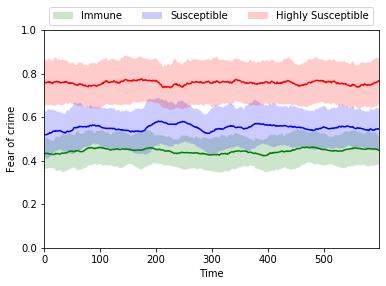

0.5860885648542088

In [632]:
plot(vertices,s0,lamda=lamda,psi=psi,nu=nu,
     mu=mu,modelo=modelo,T=T,draw=True,legends=grupos)

In [633]:
## modelo sin grafo
modelo='random'

In [634]:
# Simulación miedo al crimen
S=generate(vertices,psi=psi,
           nu=nu,mu=mu,T=T,
           s=s0,lamda=lamda,modelo=modelo)[0].T

In [635]:
## Convertir a formato que lee plotly
X=pd.DataFrame(index=np.arange(T*9))
X['Fear']=np.array([list(S[index_examples[i]].flatten()) for i in range(len(index_examples))]).flatten()
X['Time']=list(np.arange(T))*9
X['Group']=np.array([[list(grupos.values())[i]]*3*T for i in range(len(grupos))]).flatten()
X['propiedad']=(['max']*T+['min']*T+['random']*T)*3

In [636]:
fig=px.line(X,x='Time',y='Fear',color='propiedad',range_y=[0,1],facet_row='Group')
fig.show()

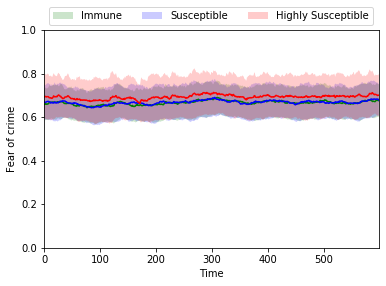

0.6763351450158073

In [637]:
plot(vertices,s0,lamda=lamda,psi=psi,nu=nu,
     mu=mu,modelo=modelo,T=T,draw=True,legends=grupos)